In [2]:
# Defining it in a new way with one F2(z)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import scipy.integrate as integrate
mη = 0.547
mρ = 0.7755
mπ = 0.13957
m1 = np.sqrt(1.84)
g1 = 1.41
g2 = -3.67
m2 = np.sqrt(2.99)
h1 = 2.33
h2 = 5.28
R = 5
ε = 10**(-5)

sv = np.linspace(1,5,200)
sqrtsv = [np.sqrt(v) for v in sv]
#print(sqrtsv)
#calvF21 = [F2(5*(p1(s))) for s in sv]
#calvF22 = [F2(5*(p2(s))) for s in sv]
#print(calvF22)

def λ(x,y,z):
    return x**2+y**2+z**2-2*x*y-2*y*z-2*z*x

def ρ0(s,m1sq,m2sq):
    return np.sqrt(λ(s,m1sq,m2sq))/ (8*np.pi*s)

#def ρtilde1(x):
#    return (((ρ1(x))/(x*(x-s-1j*ε)))*(s/(1j*np.pi)))

#def ρtilden1int(x):
#    return integrate.quad (ρtilde1, 0.3186887849, np.inf)

#calvρt = [ρtilden1int(s) for v in sv]
#print(calvρt)
    
#def ρtilde2(x):
#    return (((ρ2(x))/(x*(x-s-1j*ε)))*(s/(1j*np.pi)))

#def ρtilde1(x):
#    return integrate.quad ((((ρ1(x))/(x*(x-s-1j*ε)))*(s/(1j*np.pi))), 0.3186887849, np.inf)

#calvρt = [ρtilde1(v) for v in sv]
#print(calvρt)

def ρ1(s):
    return ρ0(s,mη**2,mπ**2)

def ρ2(s):
    return ρ0(s,mρ**2,mπ**2)


def p0(s,m1sq,m2sq):
    return np.sqrt(λ(s,m1sq,m2sq)) / (2*np.sqrt(s))

def p1(s):
    return p0(s,mη**2,mπ**2)

def p2(s):
    return p0(s,mρ**2,mπ**2)

def F2(z):
    return np.sqrt((z**2)/(1 + (z**2)))

def F2mη(s):
    b = (R*p1(s))
    return F2(b**2)

def F2mπ(s):
    c= (R*p2(s))
    return F2(c**2)

def ρ(s):
    return np.matrix([[ρ1(s)*((F2mη(s))**2),0], [0,ρ2(s)*((F2mπ(s))**2)]])

def K(s):
    return ((np.matrix([[g1**2, g1*g2], [g2*g1, g2**2]]) / (m1**2 - s)) + 
            (np.matrix([[h1**2, h1*h2], [h2*h1, h2**2]]) / (m2**2 - s)))

def M(s):
    a = ((ρ(s).dot(K(s))))
    return((inv(np.identity(2)-((1j*a)/2))).dot(K(s)))
     
def M11(s):
    return ((F2mη(s))*M(s)[0,0]*(F2mη(s)))

def M22(s):
    return ((F2mπ(s))*M(s)[0,0]*(F2mπ(s)))

def σ11(s):
    return (((abs(M11(s))**2)*ρ1(s))/2)

def σ22(s):
    return (((abs(M22(s))**2)*ρ2(s))/2)

#def Sp(s):
    
    

#calva = [(ρ(v)[0,0]*ρ(v)[1,1]) for v in sv]
#print(calva)


#calM00 =[M(v)[0,0] for v in sv]
#print(calM00)
calvmη = [M11(v) for v in sv]
calvmπ = [M22(v) for v in sv]
calvσ11 = [σ11(v) for v in sv]
calvσ22 = [σ22(v) for v in sv]
#calv = [p1(v) for v in sv]
#print(calv)
#print(calv);
#for v in sv:
 
#print (M(v)[0,0])
#def a(s):
#    return ρ(s)[0,0]*ρ(s)[1,1]
#calav = [ρ(v) for v in sv]


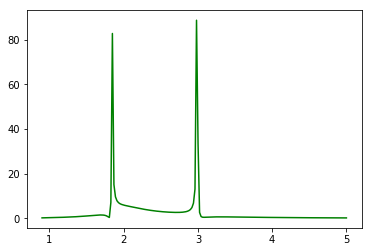

In [15]:
plt.plot(sv,[v for v in calvσ11],'g')
#plt.xlim(0,3)

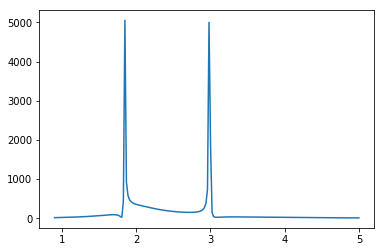

In [12]:
plt.plot(sv,[abs(v)**2 for v in calvmη])

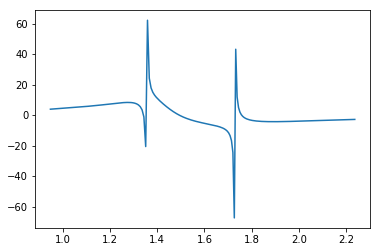

In [10]:
#plt.plot(sv,[v.imag for v in calv])
plt.plot(sqrtsv,[v.real for v in calvmη])


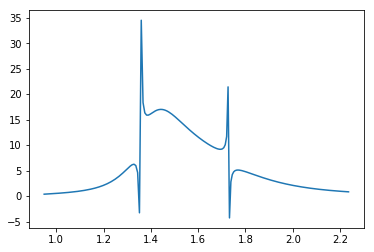

In [11]:
plt.plot(sqrtsv,[v.imag for v in calvmη])

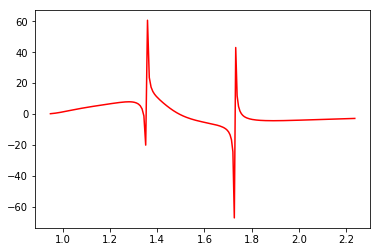

In [13]:
plt.plot(sqrtsv,[v.real for v in calvmπ], 'r')

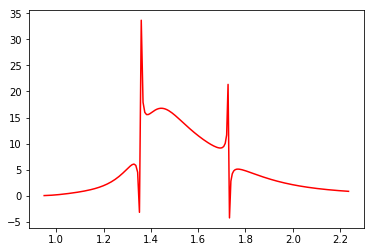

In [14]:
plt.plot(sqrtsv,[v.imag for v in calvmπ], 'r')

(0.6, 2.4)

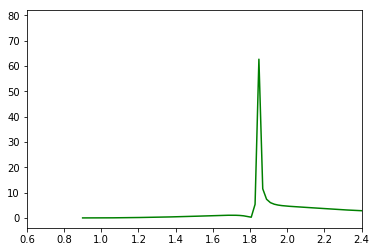

In [16]:
plt.plot(sv,[v for v in calvσ22],'g')
plt.xlim(0.6,2.4)

In [73]:
from scipy import optimize
from scipy.optimize import fsolve
#x = 2
def f(z):
    return (1/(z**2))
#root = optimize.root (f,[1,1])
y = fsolve(f,1.0)
print(y)

[4.41758531e+48]


D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
import numpy as np

def divergence(field):
    "return the divergence of a n-D field"
    return np.sum(np.gradient(field),axis=0)

In [ ]:
x = 2
#def v(x):
#    return x**2
def intv(x):
    return (integrate.quad (x**2, 1,5))
#v = (mη**2 + mπ**2)
print(intv(x))